<a href="https://colab.research.google.com/github/Orkthi/metodos-numericos-para-equacoes-diferenciais/blob/main/transporte_linear_expl%C3%ADcita_e_estabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

o valor de dt máximo para garantir estabilidade é 0.0018072216577443465 e o dt vale 0.0001 para u = 0
o valor de dt máximo para garantir estabilidade é 0.0017804612185872237 e o dt vale 0.0001 para u = 0.05
o valor de dt máximo para garantir estabilidade é 0.0017544817260981107 e o dt vale 0.0001 para u = 0.1
o valor de dt máximo para garantir estabilidade é 0.001729249486508972 e o dt vale 0.0001 para u = 0.15
o valor de dt máximo para garantir estabilidade é 0.0017047327168514725 e o dt vale 0.0001 para u = 0.2
o valor de dt máximo para garantir estabilidade é 0.0016809014113968851 e o dt vale 0.0001 para u = 0.25


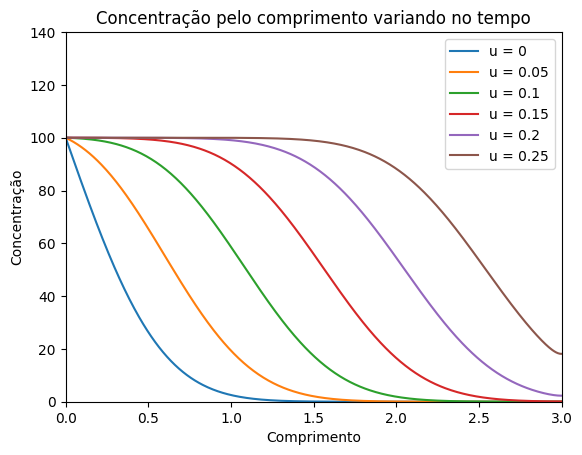

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Configurações de multiplot
# Variaveis: u, alpha, N, Ce, C0

#var = 'N'
#valores_da_var = [300 , 500, 700]

#var = 'dt'
#valores_da_var = [1e-4, 1e-3, 1e-2, 1e-1, 1]

#var = 'alpha'
#valores_da_var = [0, 5e-3, 10e-3, 15e-3, 20e-3, 25e-3]

var = 'u'
valores_da_var = [0, 5e-2, 10e-2, 15e-2, 20e-2, 25e-2]

#var = 'C0'
#valores_da_var = [0 , 20, 40, 60, 80, 100, 120, 140]

#var = 'Ce'
#valores_da_var = [0 , 20, 40, 60, 80, 100, 120, 140]


verbose = False

# Variáveis do sistema
N = 500

tf = 10
t0 = 0

alpha = 1e-2
u = 1e-1

# Comprimento do domínio
L = 3 # [m]

# Condição de intervalo de tempo dado no trabalho
dt = 1e-4

# Condição inicial em t=t0
C0 = 0

# Condição de contorno em x=0
Ce = 100

# função de simulação
def simul():
    global C0, Ce, L, N, u, alpha, dt, t0, tf

    # Intervalo de espaço
    dx = L/(N-1)

    # Constantes definidas no papel
    r = (u*dt)/(dx)
    s = (alpha*dt)/(dx**2)

    # número de iterações no tempo
    Ntimes = int((tf-t0)/dt)

    # Intervalo de tempo máximo
    dt_max = 1/(2*alpha/dx**2 + u/dx)
    # Assegurando estabilidade
    if dt > dt_max:
       print("Intervalo de tempo assumido ultrapassa o limite de estabilidade!")
       print("dt = ", dt)
       print("dt_max = ", dt_max)
       print("Encerrando simulação: Instabilidade numérica prevista")

       exit(-1)

    # Vetor concentração C[tempo][espaço]
    C = np.zeros(shape=(Ntimes, N))

    # Preenchendo o tempo inicial
    for i in range(N):
        C[0][i] = C0

    # Preenchendo a condição de contorno em x=0
    for i in range(Ntimes):
        C[i][0] = Ce

    for n in range( Ntimes -1):
        for i in range(1, N-1):
            C[n+1][i] = (s+r)*C[n][i-1] + (1-r-2*s)*C[n][i] + s*C[n][i+1]


        C[n+1][-1] = C[n+1][-2]

        if verbose == True:
            print("tempo: ", n*dt)

    X = np.zeros(N)
    # Definindo o vetor posições
    for i in range(N):
        X[i] = i*dx

    return X, C

def graphs(X, C):
     # Gráficos
        plt.plot(X, C[-1])

        plt.xlim(0, L)
        plt.ylim(0, 140)
        plt.title("Concentração pelo comprimento variando no tempo")
        plt.xlabel("Comprimento")
        plt.ylabel("Concentração")

if var == 'N':
    for N in valores_da_var:
        X, C = simul()
        dx = L/(N-1)
        dt_max = 1/(2*alpha/dx**2 + u/dx)
        print('o valor de dt máximo para garantir estabilidade é ' + str(dt_max) + ' e o dt vale ' + str(dt) + ' para N = ' + str(N))
        graphs(X, C)
    # fazedo legendas:
    legendas = []
    for i in valores_da_var:
        legendas.append("N = " + str(i))

    plt.legend(legendas)
    plt.show()

if var == 'alpha':
    for alpha in valores_da_var:
        X, C = simul()
        dx = L/(N-1)
        dt_max = 1/(2*alpha/dx**2 + u/dx)
        print('o valor de dt máximo para garantir estabilidade é ' + str(dt_max) + ' e o dt vale ' + str(dt) + ' para α = ' + str(alpha))
        graphs(X, C)

    # fazedo legendas:
    legendas = []
    for i in valores_da_var:
        legendas.append("α = " + str(i))

    plt.legend(legendas)
    plt.show()

if var == 'u':
    for u in valores_da_var:
        X, C = simul()
        dx = L/(N-1)
        dt_max = 1/(2*alpha/dx**2 + u/dx)
        print('o valor de dt máximo para garantir estabilidade é ' + str(dt_max) + ' e o dt vale ' + str(dt) + ' para u = ' + str(u))
        graphs(X, C)

    # fazedo legendas:
    legendas = []
    for i in valores_da_var:
        legendas.append("u = " + str(i))

    plt.legend(legendas)
    plt.show()

if var == 'C0':
    for C0 in valores_da_var:
        X, C = simul()
        dx = L/(N-1)
        dt_max = 1/(2*alpha/dx**2 + u/dx)
        print('o valor de dt máximo para garantir estabilidade é ' + str(dt_max) + ' e o dt vale ' + str(dt) + ' para C0 = ' + str(C0))
        graphs(X, C)

    # fazedo legendas:
    legendas = []
    for i in valores_da_var:
        legendas.append("C0 = " + str(i))

    plt.legend(legendas)

    plt.show()

if var == 'Ce':
    for Ce in valores_da_var:
        X, C = simul()
        dx = L/(N-1)
        dt_max = 1/(2*alpha/dx**2 + u/dx)
        print('o valor de dt máximo para garantir estabilidade é ' + str(dt_max) + ' e o dt vale ' + str(dt) + ' para Ce = ' + str(Ce))
        graphs(X, C)

    # fazedo legendas:
    legendas = []
    for i in valores_da_var:
        legendas.append("Ce = " + str(i))

    plt.legend(legendas)
    plt.show()

if var == 'dt':
    for dt in valores_da_var:
        X, C = simul()
        dx = L/(N-1)
        dt_max = 1/(2*alpha/dx**2 + u/dx)
        print('o valor de dt máximo para garantir estabilidade é ' + str(dt_max) + ' e o dt vale ' + str(dt))
        graphs(X, C)

    # fazedo legendas:
    legendas = []
    for i in valores_da_var:
        legendas.append("Ce = " + str(i))

    plt.legend(legendas)
    plt.show()

if var == 't':

    X, C = simul()

    for t in valores_da_var:
        it = int((t-t0)/dt)-1 # não vale o tempo t=0

        graphs(X, C, it)

    # fazedo legendas:
    legendas = []
    for i in valores_da_var:
        legendas.append("t = " + str(i))

    plt.legend(legendas)
    plt.show()